In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import ParameterGrid


In [37]:
df = pd.read_csv('final_combined_dataset.csv')
df


,date,week,cases,population,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,...,vim,vim_monthly,precipitation_avg_ordinary_kriging,precipitation_max_ordinary_kriging,precipitation_avg_regression_kriging,precipitation_max_regression_kriging,long,lat,cases_per_100k,nearby_cases_weighted
0,2012-01-01,201201,32,207044,19.000000,79.428571,55.514486,35.000000,25.048951,29.571429,...,0.850500,0.852633,5.6804,18.3375,5.2038,18.7979,-44.319627,-23.009116,15.455652,6.913995
1,2012-01-08,201202,40,207044,19.714286,82.285714,62.357393,47.428571,23.737513,26.571429,...,0.852050,0.852633,4.0716,16.5375,3.9114,16.8583,-44.319627,-23.009116,19.319565,32.825012
2,2012-01-15,201203,19,207044,20.000000,83.000000,65.236264,45.571429,24.413187,28.714286,...,0.853541,0.852633,2.0555,5.0500,1.7556,3.1368,-44.319627,-23.009116,9.176793,14.685214
3,2012-01-22,201204,33,207044,19.285714,83.000000,60.362637,43.428571,24.879121,28.857143,...,0.854877,0.852633,1.5416,5.7059,1.4138,5.2767,-44.319627,-23.009116,15.938641,2.809255
4,2012-01-29,201205,36,207044,18.857143,80.857143,50.885924,33.142857,25.989992,30.428571,...,0.856021,0.852633,2.8204,9.3826,2.0057,7.8749,-44.319627,-23.009116,17.387608,19.938997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,2022-11-27,202248,1,273988,21.857143,95.875069,82.840922,61.313170,25.507143,30.857143,...,0.683798,0.642000,4.9788,17.2846,4.8787,16.7239,-44.093522,-22.509968,0.364979,0.000000
52230,2022-12-04,202249,0,273988,21.857143,92.543531,80.151192,64.110460,24.903139,28.142857,...,0.701526,0.716900,1.8253,8.1846,1.9016,8.4208,-44.093522,-22.509968,0.000000,0.938861
52231,2022-12-11,202250,2,273988,21.000000,94.213747,79.480439,59.964030,24.597222,28.500000,...,0.717158,0.716900,3.2077,13.9077,3.6355,15.3869,-44.093522,-22.509968,0.729959,12.281740
52232,2022-12-18,202251,1,273988,21.000000,91.312065,84.229947,73.950180,23.184295,26.000000,...,0.729156,0.716900,1.8474,5.2631,1.8725,5.2542,-44.093522,-22.509968,0.364979,0.000000


In [38]:
df = df.drop(columns=['nearby_cases_weighted','city','week','population','tempe_min','humidity_max','humidity_min','temp_max','vim','vim_monthly','precipitation_max_ordinary_kriging','precipitation_avg_regression_kriging','precipitation_max_regression_kriging','long','lat','cases_per_100k','nearby_cases_weighted'])

In [39]:
df

,date,cases,humidity_avg,temp_avg,geocode,precipitation_avg_ordinary_kriging
0,2012-01-01,32,55.514486,25.048951,3300100,5.6804
1,2012-01-08,40,62.357393,23.737513,3300100,4.0716
2,2012-01-15,19,65.236264,24.413187,3300100,2.0555
3,2012-01-22,33,60.362637,24.879121,3300100,1.5416
4,2012-01-29,36,50.885924,25.989992,3300100,2.8204
...,...,...,...,...,...,...
52229,2022-11-27,1,82.840922,25.507143,3306305,4.9788
52230,2022-12-04,0,80.151192,24.903139,3306305,1.8253
52231,2022-12-11,2,79.480439,24.597222,3306305,3.2077
52232,2022-12-18,1,84.229947,23.184295,3306305,1.8474


In [40]:
# geocode_list = [3300407, 3300456, 3302007, 3302205, 3303807]
geocode_list = [3303807]

df = df[df['geocode'].isin(geocode_list)]
df

,date,cases,humidity_avg,temp_avg,geocode,precipitation_avg_ordinary_kriging
29274,2012-01-01,1,55.514486,25.048951,3303807,5.6804
29275,2012-01-08,0,62.357393,23.737513,3303807,3.9412
29276,2012-01-15,2,65.236264,24.413187,3303807,1.5898
29277,2012-01-22,3,60.362637,24.879121,3303807,1.1766
29278,2012-01-29,2,50.885924,25.989992,3303807,2.5209
...,...,...,...,...,...,...
29843,2022-11-27,0,79.717112,23.775511,3303807,4.9788
29844,2022-12-04,3,77.826146,25.071428,3303807,1.8253
29845,2022-12-11,3,77.462712,23.904762,3303807,3.2077
29846,2022-12-18,8,82.448150,22.517858,3303807,2.4548


In [41]:
df = df[df['geocode'].isin(geocode_list)]

lag_columns = ['cases_lag1', 'cases_lag2', 'cases_lag3', 'cases_lag4']

df = df.groupby('geocode', group_keys=False).apply(lambda group: group.assign(
    cases_lag1=group['cases'].shift(1),
    cases_lag2=group['cases'].shift(2),
    cases_lag3=group['cases'].shift(3),
    cases_lag4=group['cases'].shift(4)
))


# df = df.groupby('geocode', group_keys=False).apply(lambda group: group.iloc[:-4])



C:\Users\user\AppData\Local\Temp\ipykernel_17716\795830787.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('geocode', group_keys=False).apply(lambda group: group.assign(


In [42]:
geocode_list = [3300407, 3300456, 3302007, 3302205, 3303807]
df = df[df['geocode'].isin(geocode_list)]

# List of features to lag
features_to_lag = [
    "cases", "humidity_avg",
    "temp_avg","precipitation_avg_ordinary_kriging",
]

# Create lags for all features in features_to_lag for 1 to 12 weeks
lags = range(6, 7)

def create_lags(group, features, lags):
    for feature in features:
        for lag in lags:
            group[f"{feature}_lag_{lag}"] = group[feature].shift(lag)
    return group

# Group by geocode and apply lag creation
df = df.groupby('geocode', group_keys=False).apply(create_lags, features=features_to_lag, lags=lags)
df

C:\Users\user\AppData\Local\Temp\ipykernel_17716\2571972515.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('geocode', group_keys=False).apply(create_lags, features=features_to_lag, lags=lags)


,date,cases,humidity_avg,temp_avg,geocode,precipitation_avg_ordinary_kriging,cases_lag1,cases_lag2,cases_lag3,cases_lag4,cases_lag_6,humidity_avg_lag_6,temp_avg_lag_6,precipitation_avg_ordinary_kriging_lag_6
29274,2012-01-01,1,55.514486,25.048951,3303807,5.6804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29275,2012-01-08,0,62.357393,23.737513,3303807,3.9412,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29276,2012-01-15,2,65.236264,24.413187,3303807,1.5898,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
29277,2012-01-22,3,60.362637,24.879121,3303807,1.1766,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
29278,2012-01-29,2,50.885924,25.989992,3303807,2.5209,3.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29843,2022-11-27,0,79.717112,23.775511,3303807,4.9788,7.0,11.0,10.0,15.0,5.0,74.284890,24.017007,0.8428
29844,2022-12-04,3,77.826146,25.071428,3303807,1.8253,0.0,7.0,11.0,10.0,7.0,69.711634,25.122449,2.3012
29845,2022-12-11,3,77.462712,23.904762,3303807,3.2077,3.0,0.0,7.0,11.0,15.0,78.428065,20.429847,3.9107
29846,2022-12-18,8,82.448150,22.517858,3303807,2.4548,3.0,3.0,0.0,7.0,10.0,77.539105,21.608164,3.5073


In [43]:
df = df.drop(columns=['cases_lag_6','precipitation_avg_ordinary_kriging','geocode','temp_avg','humidity_avg'])

df.tail(20)

,date,cases,cases_lag1,cases_lag2,cases_lag3,cases_lag4,humidity_avg_lag_6,temp_avg_lag_6,precipitation_avg_ordinary_kriging_lag_6
29828,2022-08-14,1,1.0,3.0,14.0,6.0,67.596171,18.836735,0.0433
29829,2022-08-21,3,1.0,1.0,3.0,14.0,67.703375,20.614116,0.4046
29830,2022-08-28,2,3.0,1.0,1.0,3.0,66.905040,22.030612,0.5645
29831,2022-09-04,2,2.0,3.0,1.0,1.0,68.034333,19.767857,0.8046
29832,2022-09-11,5,2.0,2.0,3.0,1.0,74.856580,18.361224,0.1328
29833,2022-09-18,2,5.0,2.0,2.0,3.0,74.431393,19.193877,1.2327
29834,2022-09-25,1,2.0,5.0,2.0,2.0,71.758797,17.921429,0.5131
29835,2022-10-02,3,1.0,2.0,5.0,2.0,64.482619,20.408164,0.0869
29836,2022-10-09,3,3.0,1.0,2.0,5.0,74.855336,16.163265,0.6343
29837,2022-10-16,5,3.0,3.0,1.0,2.0,61.107726,22.482993,0.3189


In [44]:
df_cleaned = df.dropna()
df=df_cleaned
df

,date,cases,cases_lag1,cases_lag2,cases_lag3,cases_lag4,humidity_avg_lag_6,temp_avg_lag_6,precipitation_avg_ordinary_kriging_lag_6
29280,2012-02-12,3,1.0,2.0,3.0,2.0,55.514486,25.048951,5.6804
29281,2012-02-19,3,3.0,1.0,2.0,3.0,62.357393,23.737513,3.9412
29282,2012-02-26,2,3.0,3.0,1.0,2.0,65.236264,24.413187,1.5898
29283,2012-03-04,2,2.0,3.0,3.0,1.0,60.362637,24.879121,1.1766
29284,2012-03-11,4,2.0,2.0,3.0,3.0,50.885924,25.989992,2.5209
...,...,...,...,...,...,...,...,...,...
29843,2022-11-27,0,7.0,11.0,10.0,15.0,74.284890,24.017007,0.8428
29844,2022-12-04,3,0.0,7.0,11.0,10.0,69.711634,25.122449,2.3012
29845,2022-12-11,3,3.0,0.0,7.0,11.0,78.428065,20.429847,3.9107
29846,2022-12-18,8,3.0,3.0,0.0,7.0,77.539105,21.608164,3.5073


In [45]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation between all numeric columns and 'cases'
correlation_with_cases = df[numeric_cols].corr()['cases']

# Display the correlations
print(correlation_with_cases)

cases                                       1.000000
cases_lag1                                  0.929299
cases_lag2                                  0.862938
cases_lag3                                  0.800236
cases_lag4                                  0.720263
humidity_avg_lag_6                          0.235000
temp_avg_lag_6                              0.106254
precipitation_avg_ordinary_kriging_lag_6    0.234453
Name: cases, dtype: float64


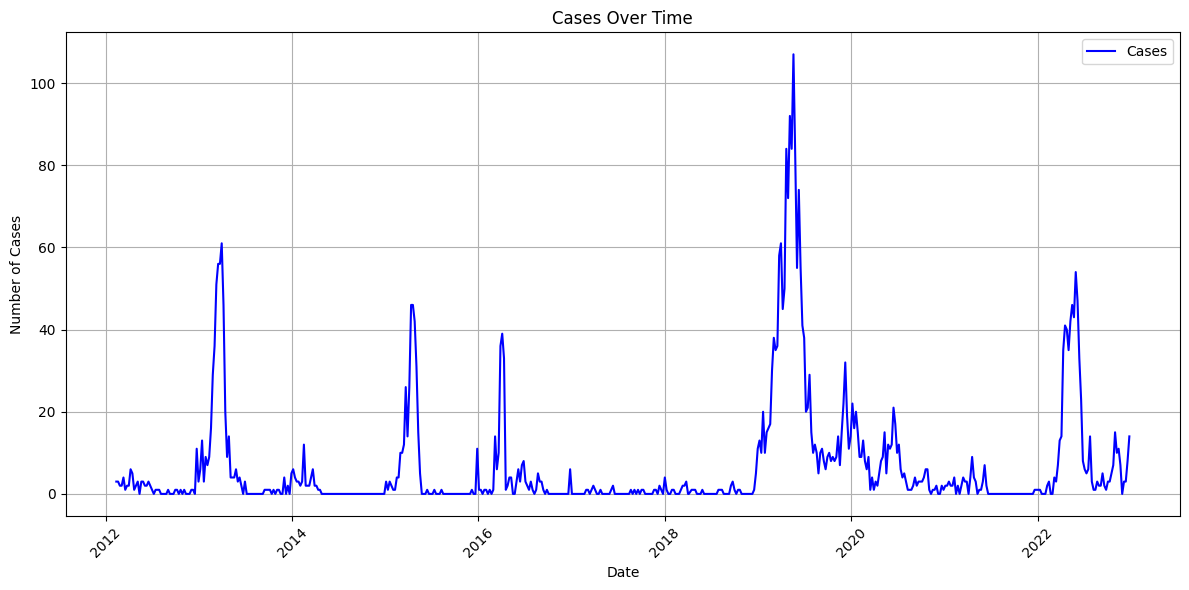

In [46]:
# Assuming 'df' is your DataFrame and 'date' and 'cases' are columns in it
df['date'] = pd.to_datetime(df['date'])  # Ensure the 'date' column is in datetime format

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cases'], label='Cases', color='blue')
plt.title('Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


PACF TO EVALUATE AR MODEL
ACF TO EVALUATE MA MODEL

YESTER DAY AND DAY BEFORE YESTERDAY - 2 ND ORDER AR
IF ERROR TERM OF YESTERDAY  1 ORDER MA

In [47]:
AR_df = df
AR_df =AR_df.drop(columns=['precipitation_avg_ordinary_kriging_lag_6','temp_avg_lag_6','humidity_avg_lag_6','cases_lag4','cases_lag3','cases_lag2','cases_lag1'])
AR_df

,date,cases
29280,2012-02-12,3
29281,2012-02-19,3
29282,2012-02-26,2
29283,2012-03-04,2
29284,2012-03-11,4
...,...,...
29843,2022-11-27,0
29844,2022-12-04,3
29845,2022-12-11,3
29846,2022-12-18,8


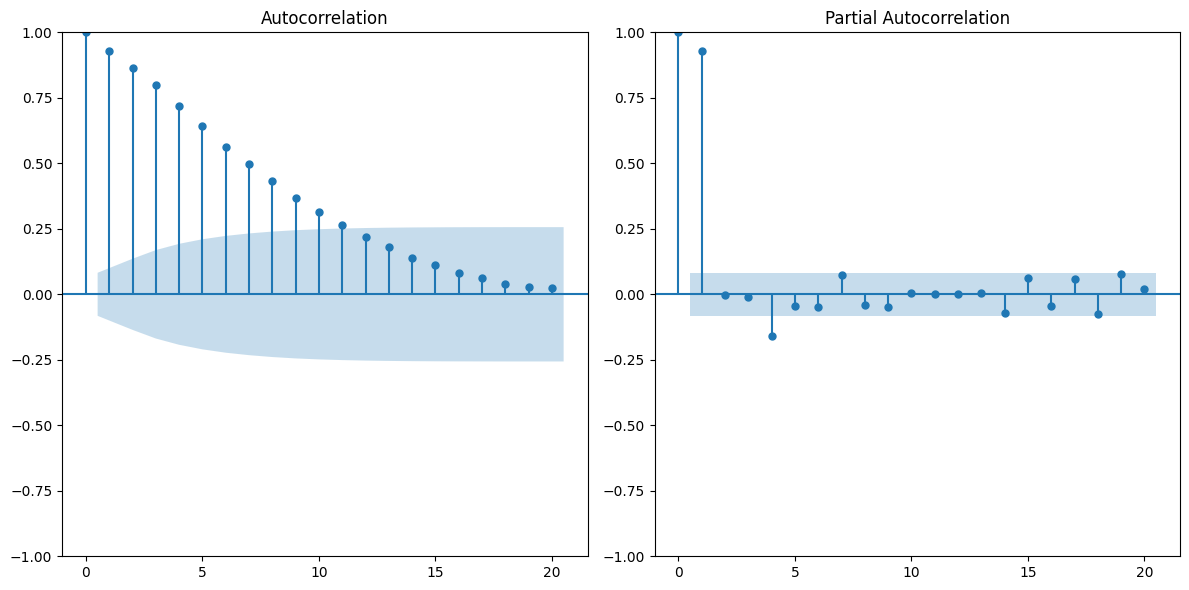

In [48]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(AR_df['cases'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(AR_df['cases'], lags=20, ax=plt.gca())

plt.tight_layout()
plt.show()

FEWER TIMES OF REPEATED SIGNIFICANCE SPIKE TO UNDERSTAND SEASONAL MODEL
acf determine the MA model 
significance only repeated once after inital spike so , Q is 1 P is 0.

The Fuller statistic (also called the ADF statistic) is the test statistic calculated during the Dickey-Fuller test. It is compared to critical values to determine if the null hypothesis can be rejected.
A more negative Fuller statistic generally indicates a stronger indication that the series is stationary (rejecting the null hypothesis)

The critical values are thresholds against which the test statistic is compared. These are typically given for different significance levels (e.g., 1%, 5%, and 10%).
For example:
At the 1% level, the critical value might be -3.45.
At the 5% level, the critical value might be -2.86.
At the 10% level, the critical value might be -2.57.
If your test statistic is smaller (more negative) than the critical value at a given significance level, you can reject the null hypothesis and conclude that the series is stationary.

In [49]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_test = adfuller(AR_df['cases'])

# Extract and display results
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

ADF Statistic: -5.122880894749131
p-value: 1.2607432542021756e-05
Critical Values:
   1%: -3.4419977165341673
   5%: -2.866678179017994
   10%: -2.5695064902419396


In [50]:
AR_df['date'] = pd.to_datetime(AR_df['date'], errors='coerce')


train_df = AR_df[AR_df['date'].dt.year <= 2020]
test_df = AR_df[AR_df['date'].dt.year >= 2021]

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
train_df

Training set shape: (464, 2)
Test set shape: (104, 2)


,date,cases
29280,2012-02-12,3
29281,2012-02-19,3
29282,2012-02-26,2
29283,2012-03-04,2
29284,2012-03-11,4
...,...,...
29739,2020-11-29,2
29740,2020-12-06,0
29741,2020-12-13,0
29742,2020-12-20,2


In [51]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')
# train_cases = train_df.set_index('date')['cases']
# test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce')
# test_cases = test_df.set_index('date')['cases']

# train_cases = train_cases.asfreq('W')
# test_cases = test_cases.asfreq('W')
# # Prepare data (ensure `train_df` and `test_df` are defined as before)
# train_cases = train_df['cases']
# test_cases = test_df['cases']
# test_dates = test_df['date']


# # Grid search for best ARIMA model
# best_aic = float("inf")
# best_order = None
# aic_results = []

# # Define parameter ranges
# p_range = range(0, 6)  # AR terms
# d_range = [0, 0]       # Differencing terms
# q_range = range(0, 6)  # MA terms

# for p in p_range:
#     for d in d_range:
#         for q in q_range:
#             try:
#                 # Fit ARIMA model
#                 model = ARIMA(train_cases, order=(p, d, q))
#                 fit_model = model.fit()

#                 # Store AIC
#                 aic_results.append((p, d, q, fit_model.aic))

#                 # Update the best model based on AIC
#                 if fit_model.aic < best_aic:
#                     best_aic = fit_model.aic
#                     best_order = (p, d, q)

#             except Exception as e:
#                 # Handle cases where ARIMA fitting fails
#                 print(f"Model ({p}, {d}, {q}) failed: {e}")

# # Display the best ARIMA order
# print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

# # Rolling forecast using the best ARIMA order
# rolling_predictions = []
# history = list(train_cases)
# forecast_horizon = 6  # Predict 2 weeks ahead

# for i in range(0, len(test_cases), forecast_horizon):
#     # Fit ARIMA with the best order
#     model = ARIMA(history, order=best_order)
#     fit_model = model.fit()

#     # Forecast for the next 2 weeks
#     forecast = fit_model.forecast(steps=forecast_horizon)
#     rolling_predictions.extend(forecast)

#     # Append actual values to history for refitting
#     actual_values = test_cases.iloc[i:i + forecast_horizon]
#     history.extend(actual_values)

# # Truncate predictions to match test set length
# rolling_predictions = rolling_predictions[:len(test_cases)]

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(test_cases, rolling_predictions))
# print(f"RMSE for rolling forecast: {rmse:.2f}")

# # Plot actual vs predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(test_dates, test_cases, label='Actual', color='blue')
# plt.plot(test_dates, rolling_predictions, label='Predicted (Rolling)', color='red')
# plt.title(f'Actual vs Predicted Cases (Rolling Forecast) | RMSE: {rmse:.2f}')
# plt.xlabel('Date')
# plt.ylabel('Cases')
# plt.legend()
# plt.show()


In [52]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA

# # Prepare data (ensure `train_df` and `test_df` are defined as before)
# train_cases = train_df['cases']
# test_cases = test_df['cases']
# test_dates = test_df['date']

# # Fit AR(1) model to training data
# model = ARIMA(train_cases, order=(3, 0, 5))  # AR(1) model
# fit_model = model.fit()

# # Rolling forecast
# rolling_predictions = []
# history = list(train_cases)  # Initialize with training data
# forecast_horizon = 2  # 2 weeks

# for i in range(0, len(test_cases), forecast_horizon):
#     # Predict for the next 2 weeks
#     forecast = fit_model.forecast(steps=forecast_horizon)
#     rolling_predictions.extend(forecast)

#     # Use actual values from the test set for the next iteration
#     actual_values = test_cases.iloc[i:i + forecast_horizon]
#     history.extend(actual_values)

#     # Refit the model with updated history
#     model = ARIMA(history, order=(3, 0, 5))
#     fit_model = model.fit()

# # Truncate predictions to match test set length
# rolling_predictions = rolling_predictions[:len(test_cases)]

# # Plot actual vs predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(test_dates, test_cases, label='Actual', color='blue')
# plt.plot(test_dates, rolling_predictions, label='Predicted (Rolling)', color='red')
# plt.title('Actual vs Predicted Cases (Rolling Forecast)')
# plt.xlabel('Date')
# plt.ylabel('Cases')
# plt.legend()
# plt.show()


In [53]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# # Prepare data (ensure `train_df` and `test_df` are defined as before)
# train_cases = train_df['cases']
# test_cases = test_df['cases']
# test_dates = test_df['date']

# # Fit ARIMA(3,0,5) model to training data
# model = ARIMA(train_cases, order=(3, 0, 1))
# fit_model = model.fit()

# # Rolling forecast
# rolling_predictions = []
# history = list(train_cases)  # Initialize with training data
# forecast_horizon = 2  # 2 weeks

# for i in range(0, len(test_cases), forecast_horizon):
#     # Predict for the next 2 weeks
#     forecast = fit_model.forecast(steps=forecast_horizon)
#     rolling_predictions.extend(forecast)

#     # Use actual values from the test set for the next iteration
#     actual_values = test_cases.iloc[i:i + forecast_horizon]
#     history.extend(actual_values)

#     # Refit the model with updated history
#     model = ARIMA(history, order=(3, 0, 1))
#     fit_model = model.fit()

# # Truncate predictions to match test set length
# rolling_predictions = rolling_predictions[:len(test_cases)]

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(test_cases, rolling_predictions))
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# # Plot actual vs predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(test_dates, test_cases, label='Actual', color='blue')
# plt.plot(test_dates, rolling_predictions, label='Predicted (Rolling)', color='red')
# plt.title(f'Actual vs Predicted Cases (Rolling Forecast)\nRMSE: {rmse:.2f}')
# plt.xlabel('Date')
# plt.ylabel('Cases')
# plt.legend()
# plt.show()


c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction 

Root Mean Squared Error (RMSE): 6.96


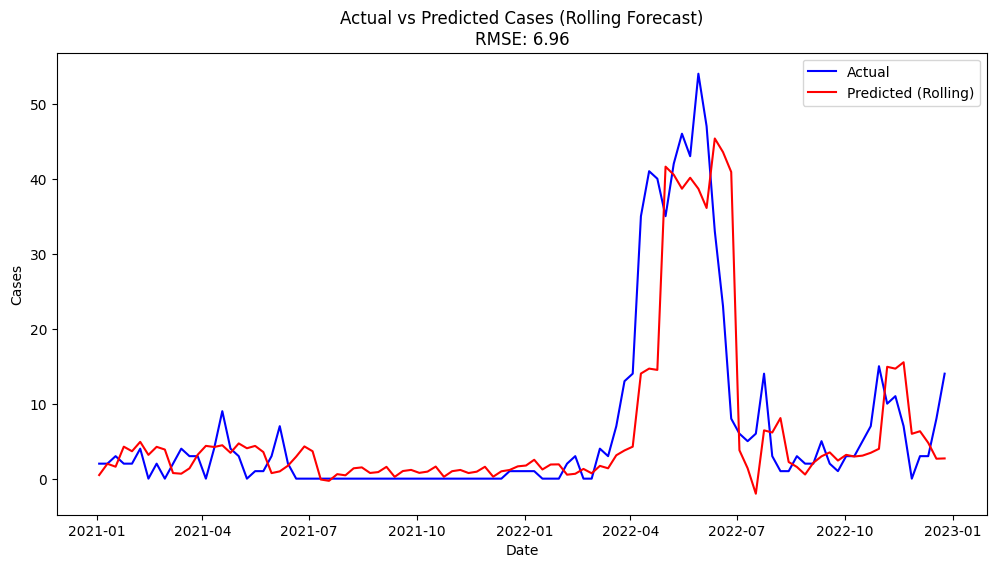

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare data (ensure `train_df` and `test_df` are defined as before)
train_cases = train_df['cases']
test_cases = test_df['cases']
test_dates = test_df['date']

# Fit ARIMA(3,0,5) model to training data
model = ARIMA(train_cases, order=(2, 0, 5))
fit_model = model.fit()

# Rolling forecast
rolling_predictions = []
history = list(train_cases)  # Initialize with training data
forecast_horizon = 3  # 2 weeks

for i in range(0, len(test_cases), forecast_horizon):
    # Predict for the next 2 weeks
    forecast = fit_model.forecast(steps=forecast_horizon)
    rolling_predictions.extend(forecast)

    # Use actual values from the test set for the next iteration
    actual_values = test_cases.iloc[i:i + forecast_horizon]
    history.extend(actual_values)

    # Refit the model with updated history
    model = ARIMA(history, order=(2, 0, 5))
    fit_model = model.fit()

# Truncate predictions to match test set length
rolling_predictions = rolling_predictions[:len(test_cases)]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_cases, rolling_predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_dates, test_cases, label='Actual', color='blue')
plt.plot(test_dates, rolling_predictions, label='Predicted (Rolling)', color='red')
plt.title(f'Actual vs Predicted Cases (Rolling Forecast)\nRMSE: {rmse:.2f}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()


SARIMA  